## Unidade 01 - Trabalho 01

- **Aluno**: João Vítor Venceslau Coelho
- **Matrícula**: 2016040403


#### 1) Quantas vezes um aluno precisa fazer uma determinada disciplina para ter aprovação? 

    a) Por disciplina? 

    b) Geral (considerando as 7 disciplinas)? 

#### 2) Quais as regiões tem mais índices de aprovação nos componentes curriculares? Hist. 

#### 3) Como estão caracterizados a estatística de notas das diversas disciplinas que compoe o dataset? Boxplot 

    a) Período (ano)
    
    b) Geral 

#### 4) Existe correlação entre as notas dos diferentes componentes curriculares? Dispersão 

#### 5) Existe uma relação entre o número médio de disciplinas cursadas por aluno e o seu desempenho? Dispersão 

#### 6) Existe correlação entre a nota do enen e o status do aluno? Hist. 

#### 7) Existe algum componente curricular na base de dados que possui uma alta correlação com os dados do ENEN Disperção

In [1]:
# Importando os componentes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

# Carregando os dados a serem analisados
arquivo = 'imd_notas_02.xlsx'
excel = pd.ExcelFile(arquivo)
imd_notas = excel.parse(0)

In [2]:
print("1) Quantas vezes um aluno precisa fazer uma determinada disciplina para ter aprovação? ")
print()
print("a) Por disciplina? ")

# Criando uma nova coluna "imd_Aprovado" de bool que informa se o aluno foi ou não aprovado
imd_notas["imd_Aprovado"] = imd_notas["status_disciplina"] == "Aprovado"

# Contando a quantidade de dispicplinas cursadas por cada aluno, separando-as em disciplinas
qnt_cursadas = imd_notas.pivot_table(index = ["disciplina_ID","a_ID"], values = ["imd_Aprovado"], aggfunc = "count")

# Calculando a media de aprovação de cada aluno em cada uma das disciplinas, caso o aluno nunca tenha sido aprovado
# terá media 0 nessa disciplina
media_disciplina = imd_notas.pivot_table(index = ["disciplina_ID","a_ID"], values = ["imd_Aprovado"], aggfunc = "mean")

# Removendo os alunos que nunca foram aprovados em determinada disciplina
qnt_cursadas = qnt_cursadas[media_disciplina["imd_Aprovado"] != 0]

# Calculando a média
media = []

# Laço que percorre as disciplinas
for i in range(0,7):
    
    # Acesso todos os alunos da disciplina i e calculo a media de aprovação
    media.append(qnt_cursadas.xs(i).mean())
    
    # Simplifico a visualização da média
    media[i] = media[i][0]
    print("A media da disciplina" , i , "é de: ", (media[i]) )
    
print()
print("b) Geral (considerando as 7 disciplinas)? ")

# Calculando a média total, isto é sem separar as informações por disciplina
print("Media total eh:",qnt_cursadas.mean()[0])

1) Quantas vezes um aluno precisa fazer uma determinada disciplina para ter aprovação? 

a) Por disciplina? 
A media da disciplina 0 é de:  1.30088495575
A media da disciplina 1 é de:  1.02852852853
A media da disciplina 2 é de:  1.1283095723
A media da disciplina 3 é de:  1.33333333333
A media da disciplina 4 é de:  1.0313111546
A media da disciplina 5 é de:  1.36293436293
A media da disciplina 6 é de:  1.09352517986

b) Geral (considerando as 7 disciplinas)? 
Media total eh: 1.14140312614


#### Logo a disciplina que, em média, precisa ser cursada mais vezes é:
    5, seguida pela 3
#### Enquanto que a disciplina que precisa ser cursada menos vezes (em média um única vez é o suficiente) é:
    1, seguida pela 4

2) Quais as regiões tem mais índices de aprovação nos componentes curriculares? Hist. 
média de aprovação
                                imd_Aprovado  qnt_aluno
bairro                                                 
Quadras Econômicas Lúcio Costa      1.000000          2
Cotovelo (Distrito Litoral)         1.000000          6
Vila Elvira                         1.000000          6
Nossa Senhora do Carmo              1.000000          7
Santa Tereza                        1.000000          5
José Bonifácio                      1.000000          6
Barro Vermelho                      0.961538         26
Areia Preta                         0.833333          6
Nordeste                            0.833333          6
Mãe Luiza                           0.800000          5

total de aprovação
                               imd_Aprovado  media de aprovação
bairro                                                         
Nova Parnamirim                       241.0            0.608586
Lagoa Nova

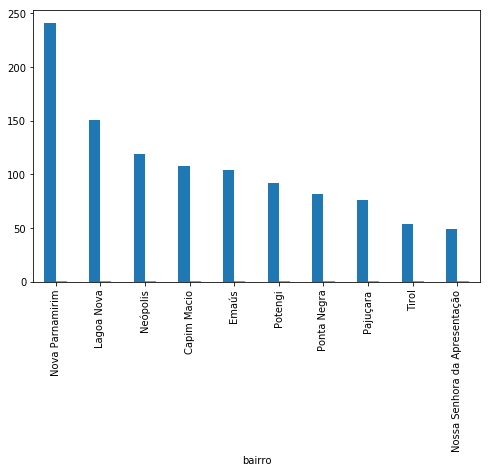

In [3]:
print("2) Quais as regiões tem mais índices de aprovação nos componentes curriculares? Hist. ")

# Criando uma nova coluna "imd_Aprovado" de bool que informa se o aluno foi ou não aprovado
imd_notas["imd_Aprovado"] = imd_notas["status_disciplina"] == "Aprovado"

# Calculo qual a media de aprovação de cada bairro
regiao_aprovacao_mean = imd_notas.pivot_table(index = ["bairro"], values = ["imd_Aprovado"], aggfunc = "mean")

# Calculo qual o numero total de aprovações de cada bairro
regiao_aprovacao_sum = imd_notas.pivot_table(index = ["bairro"], values = ["imd_Aprovado"], aggfunc = "sum")

# Calculo a quantidade de alunos de cada bairro
qnt_aluno_regiao = imd_notas.pivot_table(index = ["bairro"], values = ["a_ID"], aggfunc = "count")

# Agrupo as informações obtidas
regiao_aprovacao_mean["qnt_aluno"] = qnt_aluno_regiao
regiao_aprovacao_sum["media de aprovação"] = regiao_aprovacao_mean["imd_Aprovado"]

# Ordeno os dados em orden decrescente
indice_aprov_m = regiao_aprovacao_mean.sort_values("imd_Aprovado",ascending=False)
indice_aprov_s = regiao_aprovacao_sum.sort_values("imd_Aprovado",ascending=False)
qnt_aluno_regiao = qnt_aluno_regiao.sort_values("a_ID",ascending=False)

fig, axes = plt.subplots(figsize=(8,5))
indice_aprov_s = pd.DataFrame(indice_aprov_s)
ax = indice_aprov_s[0:10].plot(kind= 'bar', legend=False, ax = axes)

# Imprimo os dados obtidos
print("média de aprovação")
print(indice_aprov_m.head(10))
print()
print("total de aprovação")
print(indice_aprov_s.head(10))
print()
#print("Quantidad de alunos em cada região")
#print(qnt_aluno_regiao.head(10))
#print()

#### As regiões com o maior indice de aprovação são:
    - Quadras Econômicas Lúcio Costa
    - Cotovelo (Distrito Litoral),
    - Vila Elvira
    - Nossa Senhora do Carmo
    - Santa Tereza
    - José Bonifácio
#### Todas com uma taxa de aprovação de 100%

#### Porém as regioes com o maior número de aprovações são:
    - Nova Parnamirim
    - Lagoa Nova
    - Neópolis
    - Capim Macio
    - Emaús
#### Todas com mais de 100 aprovações, sendo que Nova Parnamirim possui mais de 240 aprovações

#### Detalhe: Nova Parnamirim possui 396 alunos, Lagoa Nova possui 253 e Neópolis possui 202

3) Como estão caracterizados a estatística de notas das diversas disciplinas que compoe o dataset? Boxplot
a) Período (ano)


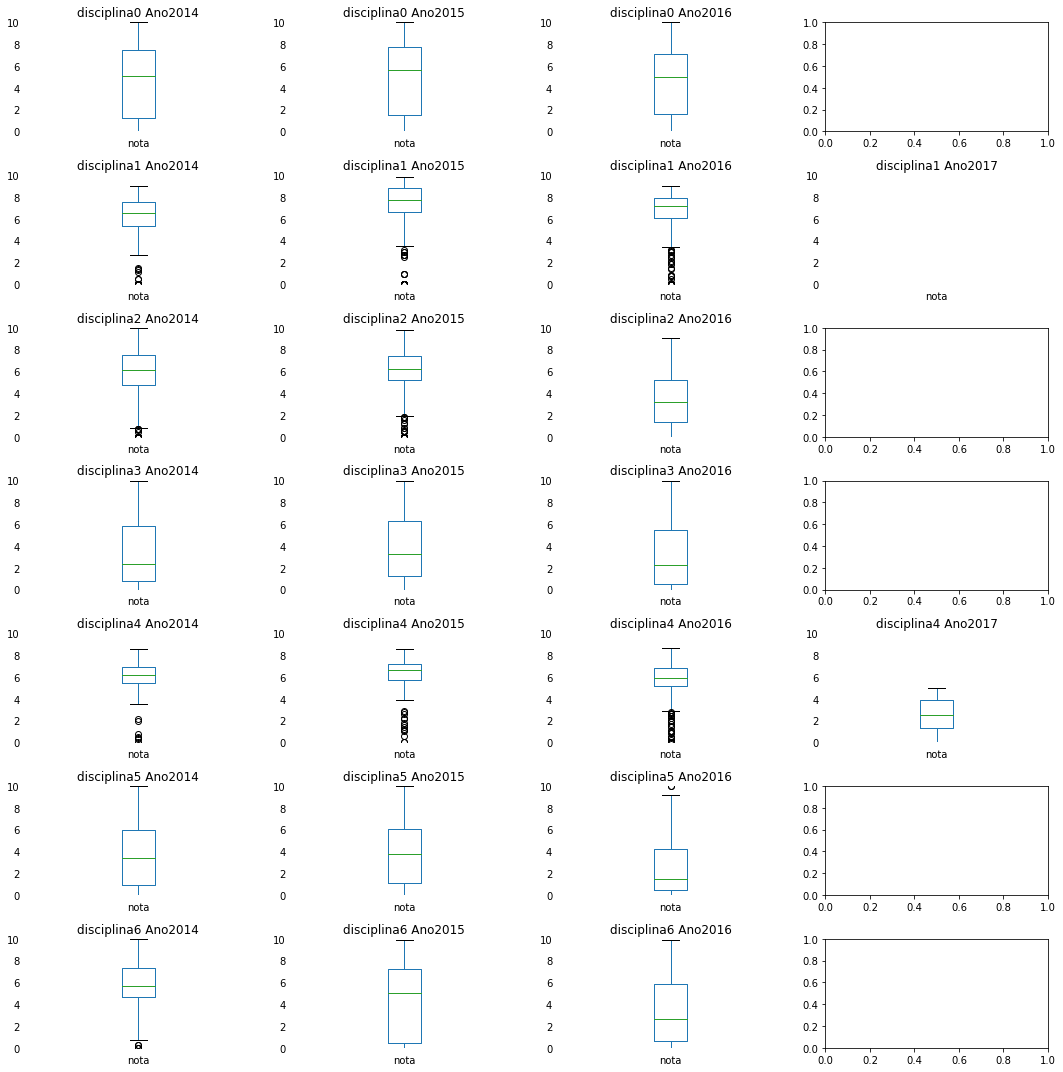

In [4]:
print("3) Como estão caracterizados a estatística de notas das diversas disciplinas que compoe o dataset? Boxplot")
print("a) Período (ano)")

# Crio um 'grid' de figuras 7 x 4
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15,15))

# Crio uma matriz para armazenar os dados já agrupados
disciplinas_anos = [[0 for x in range(4)] for y in range(7)] # x = quantidade de anos, y = numero de disciplinas
disciplinas = ["0","1","2","3","4","5","6"]

# Inicio o agrupamento das disciplinas

# Laço que percorre as disciplinas
for i in range(0,7):
    
    # Variavel auxiliar para armazenar temporariamente os dados de uma disciplina
    aux = imd_notas[imd_notas["disciplina_ID"] == i]
    aux = aux.drop(['a_ID','CEP','ano_ingresso','periodo_ingresso','enen_nota','status','status_disciplina','bairro','imd_Aprovado'], axis=1)
    # Laço que percorre os 4 anos (2014,2015,2016,2017)
    for j in range(0,4):
        
        # Variavel que informa o ano dos dados
        ano = j+2014
        
        # Guardo as informações da disciplina i durante o ano j
        disciplinas_anos[i][j] = aux[aux["ano_disciplina"] == j+2014]
        
        # Variavel auxiliar para realizar o teste se o dataset obtido é ou não vazio
        aux2 =  disciplinas_anos[i][j]
        
        # Se não for vazio, faço o plot dele
        if aux2.empty != True: 
            ax = disciplinas_anos[i][j]["nota"].plot(kind="box",
                 title="disciplina" + disciplinas[i] + " Ano" + str(ano),legend=False,ax=axes[i, j])
        ax.tick_params(bottom="off", top="off", left="off", right="off")
        ax.set_ylim(0.0,10.0)
        #ax.set_xlim(0,10) 
        for key, spine in ax.spines.items():
            spine.set_visible(False)
            
plt.tight_layout()            

#### A disciplina com as melhores médias de notas em todos os 3/4 anos é a 1, seguida pela 4

#### A disciplina com as piores médias de notas em todos os 3/4 anos é a 3, seguida pela 5

#### O ano que em média possui a melhor nota (também em média) é 2015 enquanto o que possui a pior é 2016 (2017 não foi analisado)

b) Geral


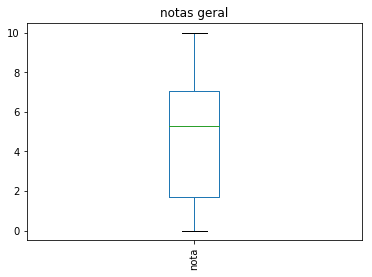

In [5]:
print("b) Geral")
# O plot de todas as notas sem realizar nenhum agrupamento
imd_notas.nota.plot(kind='box',title="notas geral",legend=False,rot=90)

#### Em média as notas são um pouco maiores que 5, porém menores que 6, ao analisarmos todas as 7 disciplinas no periodo de 2014-2017

In [14]:
# Agrupamento dos dados para a questão 4


notas_disci = imd_notas.groupby(["a_ID","disciplina_ID","ano_disciplina","periodo_disciplina"]).nota.unique()
notas_disci
#disciplinas = ["0","1","2","3","4","5","6"]

modelo_bruto = {'0': [ None ,None ,None ,None ,None ,None ,None ,None ], 
                '1': [ None ,None ,None ,None ,None ,None ,None ,None ],
                '2': [ None ,None ,None ,None ,None ,None ,None ,None ],
                '3': [ None ,None ,None ,None ,None ,None ,None ,None ],
                '4': [ None ,None ,None ,None ,None ,None ,None ,None ],
                '5': [ None ,None ,None ,None ,None ,None ,None ,None ],
                '6': [ None ,None ,None ,None ,None ,None ,None ,None ]}
                    #[ 14.1 ,14.2 ,15.1 ,15.2 ,16.1 ,16.2 ,17.1 ,17.2 ]
    
# modelo de como serão armazenas as notas dos alunos,
# cada coluna representa uma disciplina,
# as linhas representam as notas dos seguintes periodos, respectivamente:
    # 2014.1
    # 2014.2
    # 2015.1
    # 2015.2
    # 2016.1
    # 2016.2
    # 2017.1
    # 2017.2
    
modelo = pd.DataFrame(modelo_bruto, columns = ['0', '1', '2', '3', '4','5','6'])


# Organizo as notas de cada um dos alunos no modelo de matriz/dataframe criado anteriormente
notas= []
for aluno in range(900):
    aux = pd.DataFrame(modelo_bruto, columns = ['0', '1', '2', '3', '4','5','6'])
    # Para cada uma das 7 diciplinas
    for disciplina in range(0,7): 
        # Verifico se o aluno ja cursou essa disciplina
        if (disciplina in notas_disci.xs(aluno)): 
            # Para cada um dos anos
            for ano in range(2014,2018): 
                # Verifico se o aluno cursou a disciplina indicada nesse ano
                if (ano in notas_disci.xs(aluno).xs(disciplina)): 
                    # Para cada um dos dois possiveis semestres do ano
                    for periodo in range(1,3): 
                         # verifico se o aluno cursou a disciplina indicada nesse semestre do ano
                        if (periodo in notas_disci.xs(aluno).xs(disciplina).xs(ano)):
                            # Verifico qual é o ano e periodo analisado para poder adicionar a informação na 
                            # posição certa da matriz/dataframe modelo
                            
                            if (ano == 2014):
                                if (periodo == 1):
                                    aux.iloc[0,disciplina] = notas_disci.xs(aluno).xs(disciplina).xs(ano).xs(periodo)[0]
                                elif (periodo == 2):
                                    aux.iloc[1,disciplina] = notas_disci.xs(aluno).xs(disciplina).xs(ano).xs(periodo)[0]
                            elif (ano == 2015):
                                if (periodo == 1):
                                    aux.iloc[2,disciplina] = notas_disci.xs(aluno).xs(disciplina).xs(ano).xs(periodo)[0]
                                elif (periodo == 2):
                                    aux.iloc[3,disciplina] = notas_disci.xs(aluno).xs(disciplina).xs(ano).xs(periodo)[0]
                            elif (ano == 2016):
                                if (periodo == 1):
                                    aux.iloc[4,disciplina] = notas_disci.xs(aluno).xs(disciplina).xs(ano).xs(periodo)[0]
                                elif (periodo == 2):
                                    aux.iloc[5,disciplina] = notas_disci.xs(aluno).xs(disciplina).xs(ano).xs(periodo)[0]
                            elif (ano == 2017):
                                if (periodo == 1):
                                    aux.iloc[6,disciplina] = notas_disci.xs(aluno).xs(disciplina).xs(ano).xs(periodo)[0]
                                elif (periodo == 2):
                                    aux.iloc[7,disciplina] = notas_disci.xs(aluno).xs(disciplina).xs(ano).xs(periodo)[0]
                            #print(aluno, disciplina, ano, periodo, notas_disci.xs(aluno).xs(disciplina).xs(ano).xs(periodo)[0])
    # Adiciono a informação coletada do aluno numa lista com os dataframes
    notas.append(aux)


4) Existe correlação entre as notas dos diferentes componentes curriculares? Dispersão


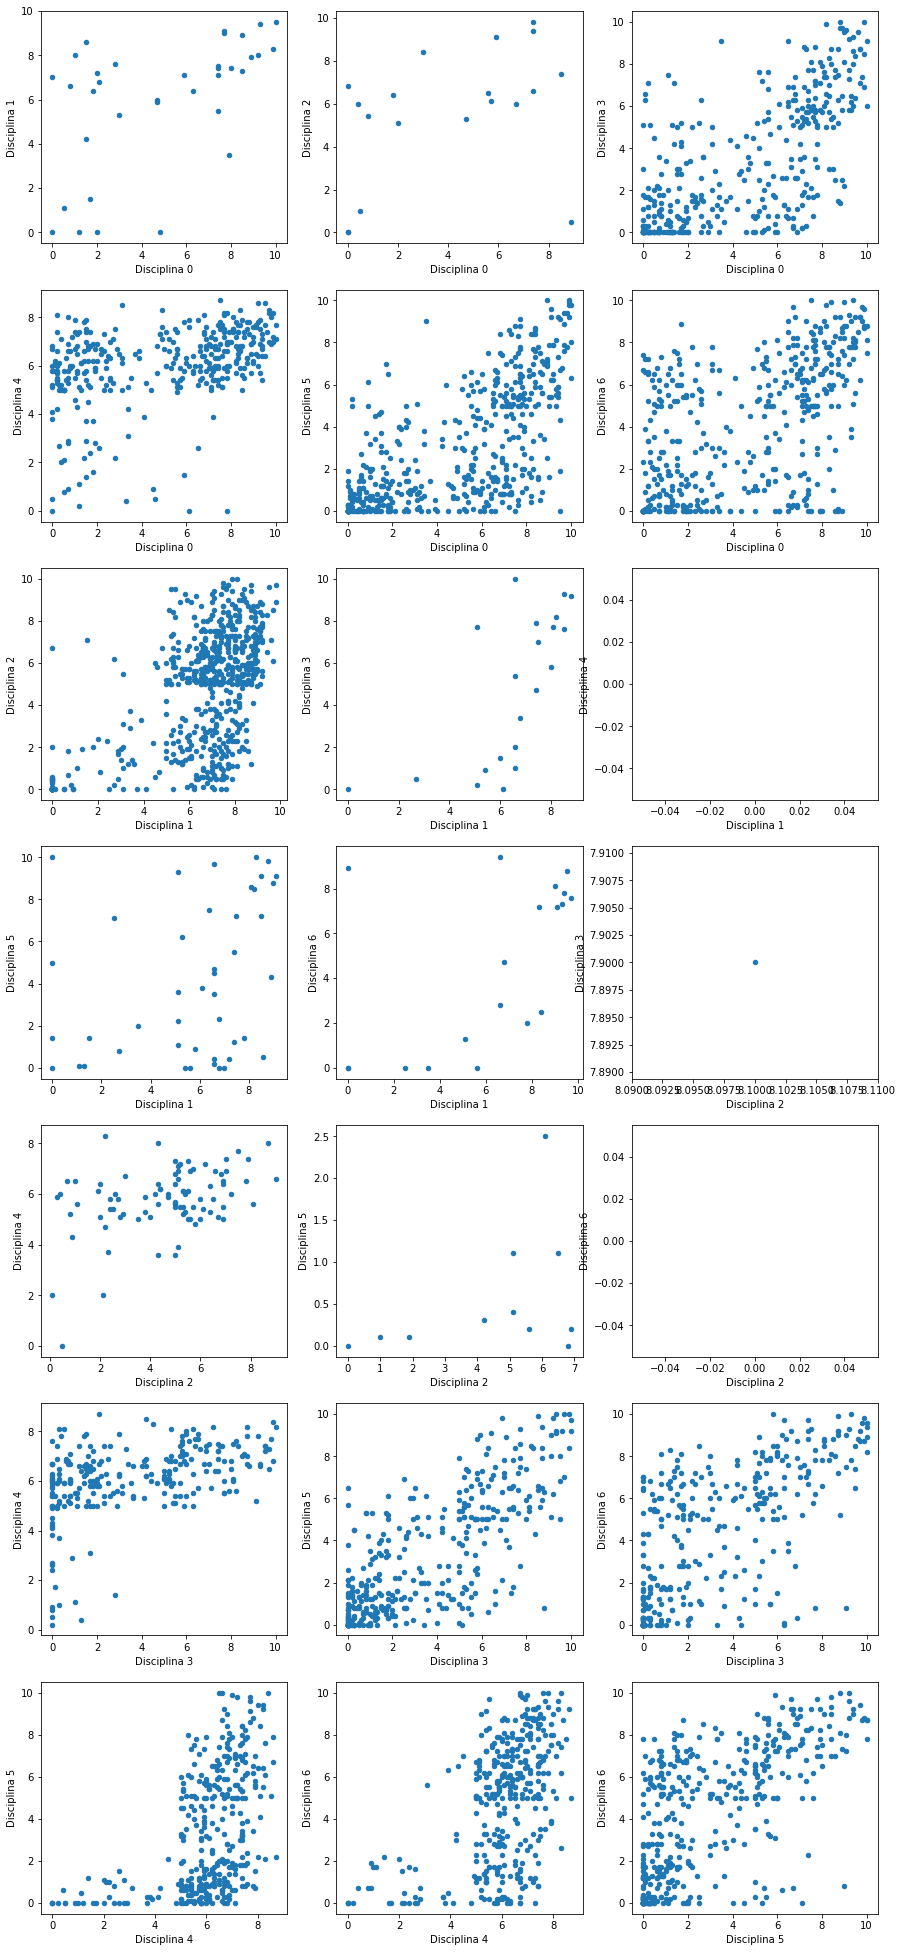

In [7]:
print("4) Existe correlação entre as notas dos diferentes componentes curriculares? Dispersão")
# Junto todos os dados já organizados em um grande dataset
notas_all = pd.concat(notas)

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15,35))
linha = 0
coluna = 0
# Faço o plot apenas dos dados que podem ser comparados, isto é, se um aluno cursou no mesmo semestre 
# as duas disciplinas analisadas, os dados dele aparecem no plot, caso contrário, esse dado não é plotado.
for i in range(0,7):
    for j in range(i+1,7):
        ax = notas_all.plot(kind='scatter',x=i,y=j,ax=axes[linha,coluna])
        ax.set_xlabel('Disciplina ' + str(i))
        ax.set_ylabel('Disciplina ' + str(j))
        
        coluna = coluna + 1
        if (coluna > 2):
            linha = linha + 1
            coluna = 0

#### Pode-se concluir que a relação entre as notas das disciplinas é muito fraca, todas os dados se encontram muito dispersos, existem algumas concentrações, porém não representam uma relação muito forte

5) Existe uma relação entre o número médio de disciplinas cursadas por aluno e o seu desempenho? Dispersão


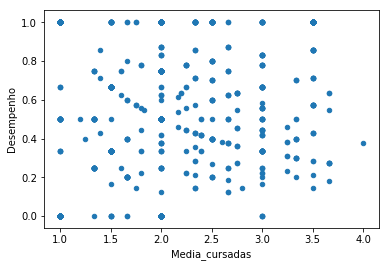

In [12]:
print("5) Existe uma relação entre o número médio de disciplinas cursadas por aluno e o seu desempenho? Dispersão")

imd_notas["imd_Aprovado"] = imd_notas["status_disciplina"] == "Aprovado"

# conto as notas e as organizo por aluno,ano da disciplina e periodo da mesma
numero_de_cursadas = imd_notas.pivot_table(index = ["a_ID","ano_disciplina","periodo_disciplina"], values = ["nota"], aggfunc = "count")

# calculo a media de aprovações de cada aluno
desempenho = imd_notas.pivot_table(index = ["a_ID"], values = ["imd_Aprovado"], aggfunc = "mean")
desempenho = desempenho.reset_index()

# calculo o numero médio de disciplinas cursadas por cada aluno e armazeno o resultado numa lista
medias = []
for i in range(900):
    medias.append(numero_de_cursadas.xs(i).mean())
    medias[i] = medias[i][0]

# crio um dataset com os dados obtidos
curs_desen = pd.DataFrame()
curs_desen["Media_cursadas"] = medias
curs_desen["Desempenho"] = desempenho["imd_Aprovado"]

# Ploto o gráfico de dispersão obtido
curs_desen.plot.scatter(x="Media_cursadas",y="Desempenho")

#### Não existe uma relação muito grande, um aluno pode em um semestre estar cursando uma única disciplina e ser aprovado, enquanto no outro semeestre tambem cursar uma única disciplina e ser reprovado, o número de disciplinas médio de disciplinas cursadas pode influenciar no desempenho do aluno porém não é decisivo para o seu desempenho

6) Existe correlação entre a nota do enen e o status do aluno? Hist.


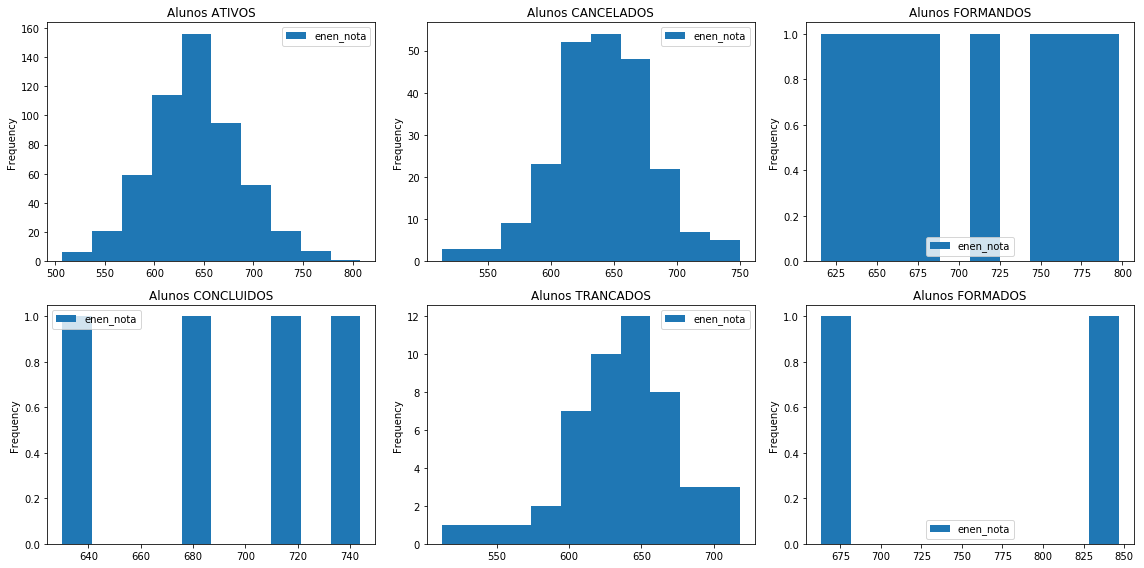

In [9]:
print("6) Existe correlação entre a nota do enen e o status do aluno? Hist.")

# Uma função que interpeta as strings: ATIVO, CANCELADO, FORMANDO, CONCLUIDO, TRANCADO, como 1, 2, 3, 4 ou 5.
def statusIs(x):
    if x == "ATIVO":
        return 1
    elif x == "CANCELADO":
        return 2
    elif x == "FORMANDO":
        return 3
    elif x == "CONCLUIDO":
        return 4
    elif x == "TRANCADO":
        return 5
    elif x == "FORMADO":
        return 6

# Crio um novo DataFrame com os dados a serem utilizados
enem_status = pd.DataFrame()
enem_status["a_ID"] = imd_notas["a_ID"]
enem_status["status"] = imd_notas["status"].apply(statusIs)
enem_status["enen_nota"] = imd_notas["enen_nota"]

# Agrupo os dados do enem por aluno e status enquanto calculo a media
# (detalhe importante: como cada aluno só tem uma nota do enem, esse calculo da media não faz nada muito relevante)
aluno_enem_status = enem_status.pivot_table(index = ["status","a_ID"],values = ["enen_nota"], aggfunc = "mean")

# Separo os dados obtidos em 6 categorias:
stat_ativ = aluno_enem_status.xs(1)#ATIVO
stat_canc = aluno_enem_status.xs(2)#CANCELADO
stat_form = aluno_enem_status.xs(3)#FORMANDO
stat_tran = aluno_enem_status.xs(4)#CONCLUIDO
stat_conc = aluno_enem_status.xs(5)#TRANCADO
stat_form2 = aluno_enem_status.xs(6)#FORMADO

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

# Faço o plot dos gráficos no modo 'hist'
ax = stat_ativ.reset_index().plot(kind='hist',x='a_ID', y='enen_nota',title="Alunos ATIVOS",ax=axes[0,0])
ax = stat_canc.reset_index().plot(kind='hist',x='a_ID', y='enen_nota',title="Alunos CANCELADOS",ax=axes[0,1])
ax = stat_form.reset_index().plot(kind='hist',x='a_ID', y='enen_nota',title="Alunos FORMANDOS",ax=axes[0,2])
ax = stat_tran.reset_index().plot(kind='hist',x='a_ID', y='enen_nota',title="Alunos CONCLUIDOS",ax=axes[1,0])
ax = stat_conc.reset_index().plot(kind='hist',x='a_ID', y='enen_nota',title="Alunos TRANCADOS",ax=axes[1,1])
ax = stat_form2.reset_index().plot(kind='hist',x='a_ID', y='enen_nota',title="Alunos FORMADOS",ax=axes[1,2])

plt.tight_layout() 

#### Não existe relação entre entre a nota do ENEM e o status do aluno, mas a maiorio dos alunos com status ativo se concentram na faixa dos 650 pontos do ENEM, assim como os alunos que cancelaram e dos que trancaram,  porem isso não quer dizer nada relevante, apenas que muitos alunos têm essa nota no ENEM

7) Existe algum componente curricular na base de dados que possui uma alta correlação com os dados do ENEN Disperção


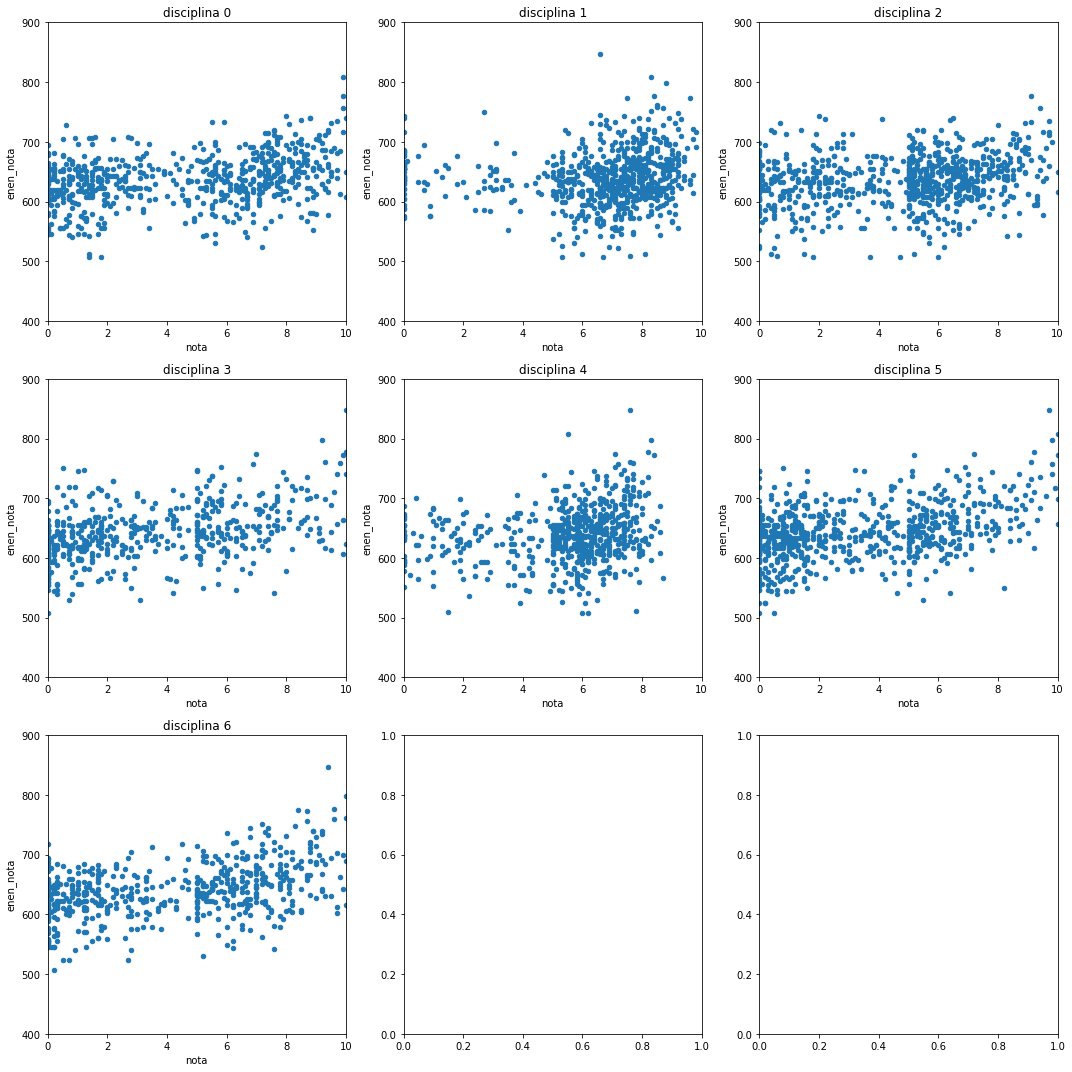

In [13]:
print("7) Existe algum componente curricular na base de dados que possui uma alta correlação com os dados do ENEN Disperção")

# figura onde os gráficos serão colocados
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

# indices das posições de cada gráfico na figura
k = 0
j = 0

# Inicio a plotagem dos gráficos
for i in range(0,7):
    # Seleciono os dados para cada disciplina
    aux = imd_notas[imd_notas['disciplina_ID'] == i]
    # ploto o gráfico dos dados selecionados em relação às notas da disciplina e do ENEM
    ax = aux.plot(kind="scatter", x="nota", y="enen_nota", ax=axes[k,j],legend=False, title="disciplina " + str(i))
    ax.set_ylim(400,900)
    ax.set_xlim(0,10)    
    
    # Informo os novos valores pára indicar a posção do próximo gráfico
    j = j+1
    if (j > 2):
        k = k +1
        j=0

plt.tight_layout()     

#### Percebemos que no geral as notas de uma disciplina não têm uma relação com as notas do ENEM. Mas existe uma grande concentração de notas acima de 5 nas disciplinas 1 e 4, ao compararmos com as notas abaixo de 5, que são bem poucas nessas duas disciplinas, em relação as outras disciplinas